Import the packages

In [1]:
#matplotlib.use('TkAgg')
%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
import random

print(__doc__)




Populating the interactive namespace from numpy and matplotlib
Automatically created module for IPython interactive environment


#Q2

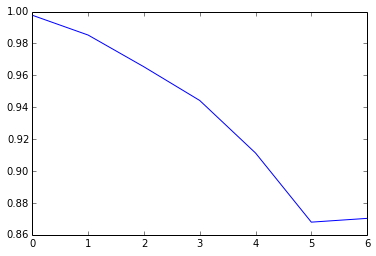

In [2]:
# import data
yelp_reviews = pd.read_csv('yelp_reviewers.txt',sep='|',header=0)
yelp_reviews = yelp_reviews.fillna(0)

# sample data
rows = yelp_reviews.sample(500)
X = rows[['q4','q5','q6']]
y = rows['user_id']
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(data_set):
    s=[]
    for n_clusters in range(2,9):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(data_set)
    
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
    
        s.append(silhouette_score(data_set,labels,metric='euclidean'))
#         print(s)
    plt.plot(s)
plot_silhouette_scores(X)

#Q3

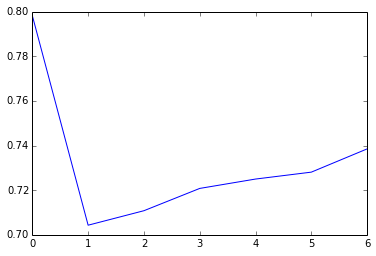

In [5]:
X2 = rows[['q8','q9','q10']]
# replacing inf with 0
X2.replace('inf',0)
plot_silhouette_scores(X2)

#Q4

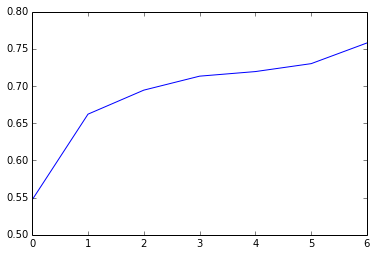

In [3]:
X3 = rows[['q11','q12','q13']]

plot_silhouette_scores(X3)

In [6]:
k_means_8 = KMeans(n_clusters=8).fit(X3)


k8_labels = k_means_8.labels_

clusters = {}
for label in k8_labels:
    try:
        clusters[label] += 1
    except:
        clusters[label] = 1

print (clusters)

{0: 132, 1: 153, 2: 31, 3: 62, 4: 12, 5: 71, 6: 9, 7: 30}


In [7]:
k8_centroids = k_means_8.cluster_centers_
for i in range(8):        
    df = X3[labels==i]
    # plot observations
    plt.plot(df['q12'],df['q13'],'o')
    # plot centroid
    lines = plt.plot(k8_centroids[i,0],k8_centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)

pylab.rcParams['figure.figsize'] = (40, 24) 
plt.show()

NameError: name 'labels' is not defined